In [2]:
import bilby
import numpy as np
import healpy as hp
import pandas as pd
import pylab
from astropy.table import Table
import astropy.cosmology as cosmo
import matplotlib.pyplot as plt

In [3]:
run_data = pd.read_csv('data/fix_results.csv')

In [4]:
param = 'mass_1'

event_id = run_data['id'].values
true_val = run_data[param].values
uni_avg = run_data['uni_'+param+'_avg'].values
uni_std = run_data['uni_'+param+'_std'].values
fix_avg = run_data['fix_'+param+'_avg'].values
fix_std = run_data['fix_'+param+'_std'].values

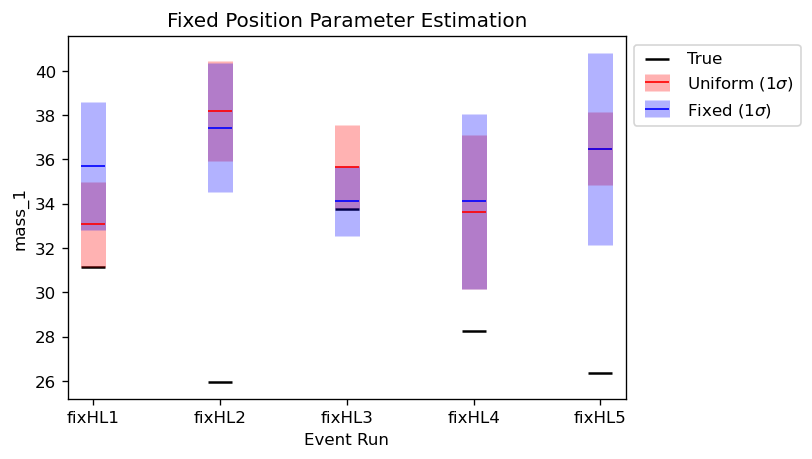

In [5]:
fig, ax = plt.subplots()
fig.set_dpi(120)
uni_error = uni_std
fix_error = fix_std
mark, caps, bars = ax.errorbar(event_id, uni_avg, yerr=uni_error, fmt='_', color='red', elinewidth=15, ms=14, label='Uniform ($1\sigma$)')
[bar.set_alpha(0.3) for bar in bars]
[cap.set_alpha(0.3) for cap in caps]
mark, caps, bars = ax.errorbar(event_id, fix_avg, yerr=fix_error, fmt='_', color='blue', elinewidth=15, ms=14, label='Fixed ($1\sigma$)')
[bar.set_alpha(0.3) for bar in bars]
[cap.set_alpha(0.3) for cap in caps]
ax.scatter(event_id, true_val, color='k', marker='_', s=196, label='True')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_title('Fixed Position Parameter Estimation')
ax.set_xlabel('Event Run')
ax.set_ylabel(param)
#ax.set_ylim([300,500])
plt.show()

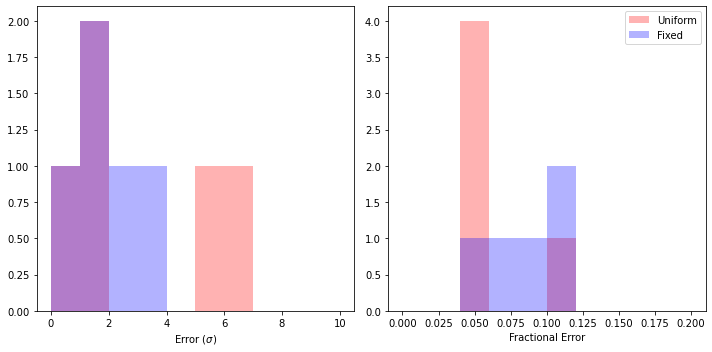

In [7]:
uni_diff = np.abs(true_val - uni_avg) / uni_std
fix_diff = np.abs(true_val - fix_avg) / fix_std

uni_frac = uni_std / uni_avg
fix_frac = fix_std / fix_avg

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
erange = [0, 10]
ax[0].hist(uni_diff, bins=10, range=erange, histtype='stepfilled', color='r', alpha=0.3)
ax[0].hist(fix_diff, bins=10, range=erange, histtype='stepfilled', color='b', alpha=0.3)
ax[0].set_xlabel('Error ($\sigma$)')
frange = [0, 0.2]
ax[1].hist(uni_frac, bins=10, range=frange, histtype='stepfilled', color='r', alpha=0.3, label='Uniform')
ax[1].hist(fix_frac, bins=10, range=frange, histtype='stepfilled', color='b', alpha=0.3, label='Fixed')
ax[1].set_xlabel('Fractional Error')
ax[1].legend()
fig.tight_layout()